In [15]:
from ocpmodels.preprocessing import AtomsToGraphs
from ocpmodels.datasets import SinglePointLmdbDataset, TrajectoryLmdbDataset, LmdbDataset
import ase.io
from ase.build import bulk
from ase.build import fcc100, add_adsorbate, molecule

import matplotlib.pyplot as plt
import lmdb
import pickle
from tqdm import tqdm
import torch
import os
import numpy as np

In [16]:
def get_predata (lmdb_path, pre_path):
    dataset= LmdbDataset({"src": lmdb_path})
    energies = torch.tensor([data.y_relaxed for data in dataset])
    sid = torch.tensor([data.sid for data in dataset])
    sorted_index = sorted(range(len(sid)), key=lambda i: sid[i])
    energies=energies[sorted_index]
    
    pre_data = np.load(pre_path)
    pre = pre_data['energy']
    ids = pre_data['ids']
    ids = np.array(list(map(int, ids)))
    sorted_index = sorted(range(len(ids)), key=lambda i: ids[i])
    pre=pre[sorted_index]
    return (energies,pre)

In [17]:
folder_path = '/media/zwbai/DATA/dft/all_copy/output/'
lmdb_file_train = folder_path + 'CuO2_strain_new.lmdb'
pre_train_path = '/home/zwbai/work/ocp-main/ocp/results/2024-01-08-17-55-12/is2re_predictions.npz'

In [18]:
e_train, pre_train = get_predata(lmdb_file_train, pre_train_path)

In [19]:
e_train.shape

torch.Size([594])

In [20]:
pre_train.shape

(594,)

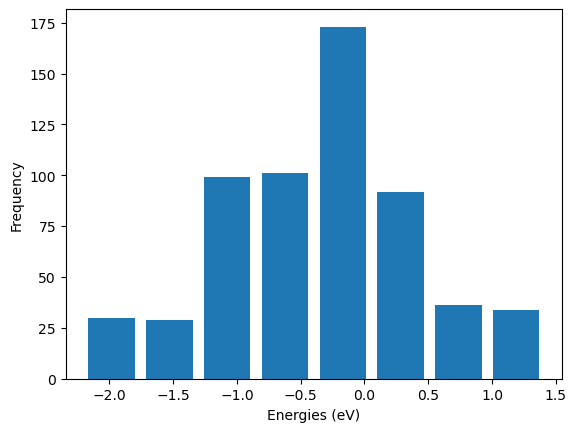

In [21]:
plt.hist(e_train, bins = 8, rwidth=0.8)
# plt.yscale("log")
plt.xlabel("Energies (eV)")
plt.ylabel("Frequency")
plt.show()

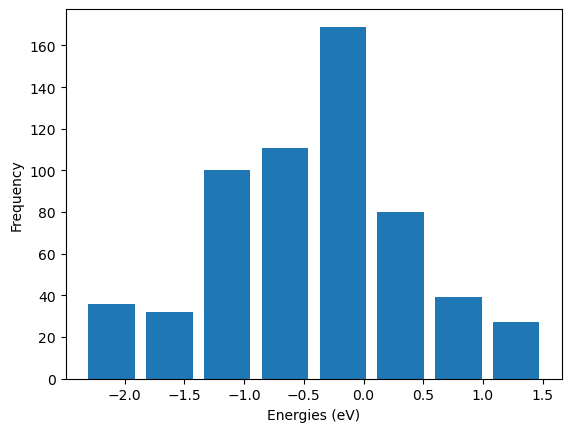

In [22]:
plt.hist(pre_train, bins = 8, rwidth=0.8)
# plt.yscale("log")
plt.xlabel("Energies (eV)")
plt.ylabel("Frequency")
plt.show()

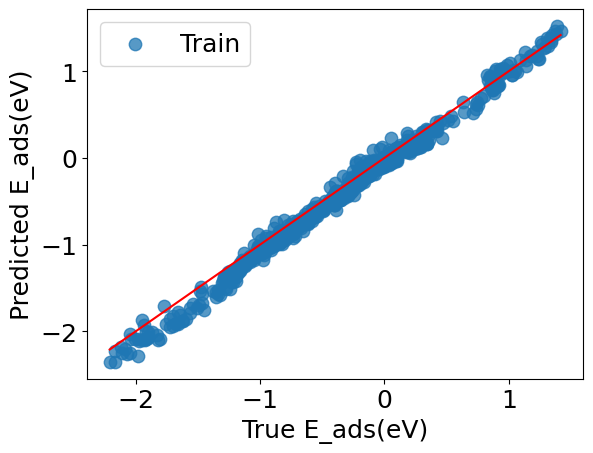

In [23]:
# 画图
plt.rcParams.update({'font.size': 18})

import matplotlib.pyplot as plt
plt.scatter(e_train, pre_train,alpha=0.75, s =80, label='Train') 
# plt.scatter(e_test, pre_test,alpha=0.8, s =80, label='Test')

plt.plot([min(e_train),max(e_train)],[min(e_train),max(e_train)], color = 'r' )

plt.xlabel("True E_ads(eV)")
plt.ylabel("Predicted E_ads(eV)")
plt.legend()
plt.show()

In [24]:
import math
from sklearn.metrics import mean_squared_error

# 假设 y_pred 和 y_true 是两个长度相同的数组，分别代表预测值和真实值
# 计算均方根误差
rmse = math.sqrt(mean_squared_error(e_train, pre_train))
print("RMSE:", rmse)

# rmse = math.sqrt(mean_squared_error(e_test, pre_test))
print("RMSE:", rmse)

RMSE: 0.10398467875664852


NameError: name 'e_test' is not defined

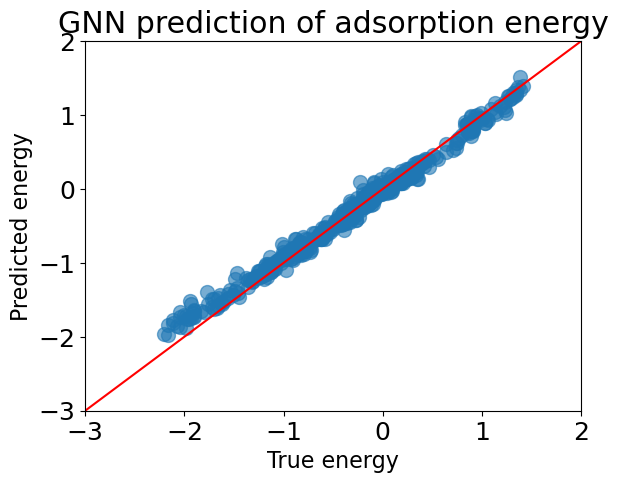

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = e_train
y = pre_train
fig, ax = plt.subplots()
# 绘制散点图，并设置图形参数
ax.scatter(x, y, alpha=0.6, s =100)
# 计算一三象限角平分线的参数
xx = np.linspace(-4, 4, 2)
yy = xx

plt.plot(yy, yy, c='r')
# 设置x和y轴刻度

# 添加标题、x轴标签、y轴标签和图例
plt.title('GNN prediction of adsorption energy')
plt.xlabel('True energy',fontsize = 16)
plt.ylabel('Predicted energy',fontsize = 16)
# plt.legend(loc='best')
# 设置x和y轴刻度，使其长度相等

# ax.axis('equal')
# 设置x和y轴的范围
plt.xlim(-3, 2)
plt.ylim(-3, 2)
# plt.axis('equal')
# 显示图形
# 这里可以添加你的绘图代码
plt.show()


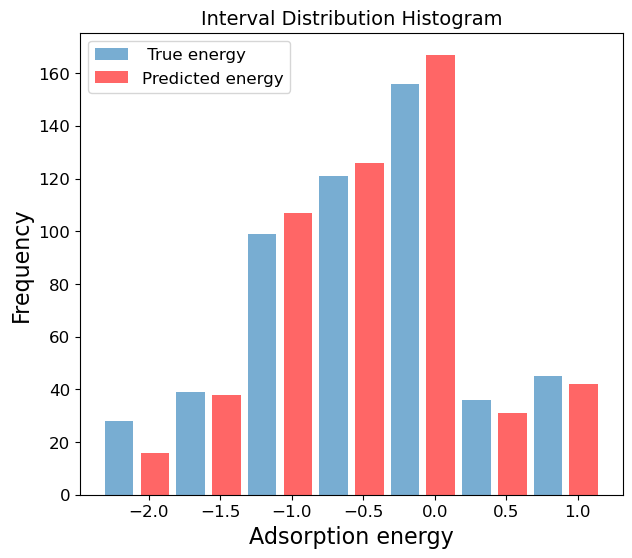

In [ ]:
import matplotlib.pyplot as plt

# 两组数据
data1 = np.array(x)
data2 = np.array(y)

bins = np.arange(min(data1), max(data1), 0.5)

# 绘制直方图
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(7, 6))  # 设置图像大小为宽度为8英寸，高度为6英寸
plt.hist(data1, bins=bins, rwidth=0.4, alpha=0.6, align='left', label=' True energy')

plt.hist(data2, bins=bins, rwidth=0.4, alpha=0.6, align='mid', label='Predicted energy', color='red')

# 添加标签和标题
plt.xlabel("Adsorption energy",fontsize = 16)
plt.ylabel("Frequency",fontsize = 16)
plt.title("Interval Distribution Histogram",fontsize = 14)

# 添加图例
plt.legend()

# 显示图形
plt.show()
